<a href="https://colab.research.google.com/github/Mayank-004/Boston-Crime/blob/main/BostonCRIME_Pyspark_Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pyspark



In [15]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly



In [ ]:

from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)

In [160]:
df1 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2015.csv",header=True)
df2 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2016.csv",header=True)
df3 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2017.csv",header=True)
df4 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2018.csv",header=True)
df5 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2019.csv",header=True)
df6 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2020.csv",header=True)
df7 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2021.csv",header=True)
union_data = df1.unionAll(df2).unionAll(df3).unionAll(df4)
union_data_new=df5.unionAll(df6).unionAll(df7)



In [161]:
union_df_new=union_data_new.toPandas()
union_df= union_data.toPandas()

In [162]:
part_one = union_df[union_df['UCR_PART']=='Part One']
cr1=part_one['OFFENSE_DESCRIPTION'].unique().tolist()
part_Two = union_df[union_df['UCR_PART']=='Part Two']
cr2=part_Two['OFFENSE_DESCRIPTION'].unique().tolist()
part_Three = union_df[union_df['UCR_PART']=='Part Three']
cr3=part_Three['OFFENSE_DESCRIPTION'].unique().tolist()
other=union_df[union_df['UCR_PART']=='Other']
cr4=other['OFFENSE_DESCRIPTION'].unique().tolist()


In [163]:
for i in range(len(union_df_new)):
    for j in cr1:
        if union_df_new.loc[i,'OFFENSE_DESCRIPTION']==j:
            union_df_new.loc[i,'UCR_PART']='Part One'
            #print(union_df_new.loc[i,'UCR_PART'])


for i in range(len(union_df_new)):
    for j in cr2:
        if union_df_new.loc[i,'OFFENSE_DESCRIPTION']==j:
            union_df_new.loc[i,'UCR_PART']='Part Two'

for i in range(len(union_df_new)):
    for j in cr3:
        if union_df_new.loc[i,'OFFENSE_DESCRIPTION']==j:
            union_df_new.loc[i,'UCR_PART']='Part Three'

for i in range(len(union_df_new)):
    for j in cr4:
        if union_df_new.loc[i,'OFFENSE_DESCRIPTION']==j:
            union_df_new.loc[i,'UCR_PART']='Other'



In [164]:
union_df_new['UCR_PART'].unique()

array([None, 'Part Two', 'Other', 'Part Three', 'Part One'], dtype=object)

In [165]:

# combine all data
union_df=pd.concat([union_df,union_df_new])

# convert pandas dataframe to spark dataframe
union_data = sqlContext.createDataFrame(union_df)


In [6]:
union_data.describe().toPandas().transpose()


,0,1,2,3,4
summary,count,mean,stddev,min,max
INCIDENT_NUMBER,490520,2.0222410692305353E8,7222569.267368518,""",0,0,""(0","WEST ROXBURY MAS"""
OFFENSE_CODE,478358,2260.05739182021,1237.0409206331267,"-71.0068549434423)""",99999
OFFENSE_CODE_GROUP,366047,-69.34739554235557,10.964368988103738,-70.9971530586772,Warrant Arrests
OFFENSE_DESCRIPTION,477868,None,None,"(0, 0)",WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...
DISTRICT,462839,None,None,A1,External
REPORTING_AREA,465074,383.35099522821434,241.36148214804334,,99
SHOOTING,113276,0.014299639602579121,0.11872356953040747,0,Y
OCCURRED_ON_DATE,465074,None,None,2015-06-15 00:00:00,2021-05-03 12:36:00
YEAR,465074,2017.4925882762743,1.7071262460933814,2015,2021


### Data Visualization

In [190]:
#Count Missing Data
missing = union_df.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / union_df.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent


In [191]:
# Remove column having more than 30% missing Values
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 30,'index'])
union_df = union_df.drop(over30, axis = 1)

In [172]:
union_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192068249,02647,THREATS TO DO BODILY HARM,B2,280,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.33011862,-71.08425106,"(42.33011862, -71.08425106)"
1,I192061894,01106,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.30060543,-71.06126785,"(42.30060543, -71.06126785)"
2,I192038828,01107,FRAUD - IMPERSONATION,A1,172,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.33428841,-71.07239518,"(42.33428841, -71.07239518)"
3,I192008877,01107,FRAUD - IMPERSONATION,E18,525,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.2370095,-71.12956606,"(42.23700950, -71.12956606)"
4,I182090828,01102,FRAUD - FALSE PRETENSE / SCHEME,D4,159,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.34243222,-71.07225766,"(42.34243222, -71.07225766)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137262,121008581,2007,VIOLATION - RESTRAINING ORDER (NO ARREST),C11,355,2021-02-08 22:00:00,2021,2,Monday,22,None,ROSSETER ST,42.2975553295965,-71.0597091024257,"(42.2975553295965, -71.0597091024257)"
137263,121005808,1102,FRAUD - FALSE PRETENSE / SCHEME,B3,289,2021-01-19 12:00:00,2021,1,Tuesday,12,Part Two,CLARKWOOD ST,42.3336792181085,-71.0918775461846,"(42.3336792181085, -71.0918775461846)"
137264,121000816,3304,NOISY PARTY/RADIO-NO ARREST,E5,675,2021-01-04 00:00:00,2021,1,Monday,0,Part Three,BRADFIELD AVENUE,0,0,"(0, 0)"
137265,120221042,3006,SICK/INJURED/MEDICAL - PERSON,E5,680,2021-04-02 10:45:00,2021,4,Friday,10,Part Three,WASHINGTON ST,42.2839024364831,-71.130862626435,"(42.2839024364831, -71.130862626435)"


In [55]:
union_df['UCR_PART'].unique()

array(['Part Two', 'Part Three', 'Part One', 'Other', None], dtype=object)

In [173]:
#remove rows with missing values
union_df=union_df.dropna()

In [174]:
union_df['UCR_PART'].unique()

array(['Part Two', 'Part Three', 'Part One', 'Other'], dtype=object)

In [175]:
union_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192068249,02647,THREATS TO DO BODILY HARM,B2,280,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.33011862,-71.08425106,"(42.33011862, -71.08425106)"
1,I192061894,01106,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.30060543,-71.06126785,"(42.30060543, -71.06126785)"
2,I192038828,01107,FRAUD - IMPERSONATION,A1,172,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.33428841,-71.07239518,"(42.33428841, -71.07239518)"
3,I192008877,01107,FRAUD - IMPERSONATION,E18,525,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.2370095,-71.12956606,"(42.23700950, -71.12956606)"
4,I182090828,01102,FRAUD - FALSE PRETENSE / SCHEME,D4,159,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.34243222,-71.07225766,"(42.34243222, -71.07225766)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137259,202112954,1102,FRAUD - FALSE PRETENSE / SCHEME,E18,465,2021-02-28 10:00:00,2021,2,Sunday,10,Part Two,BURMAH ST,0,0,"(0, 0)"
137261,121016052,3831,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,347,2021-03-13 09:10:00,2021,3,Saturday,9,Part Three,DORCHESTER AVE,42.3072894059195,-71.0584991240592,"(42.3072894059195, -71.0584991240592)"
137263,121005808,1102,FRAUD - FALSE PRETENSE / SCHEME,B3,289,2021-01-19 12:00:00,2021,1,Tuesday,12,Part Two,CLARKWOOD ST,42.3336792181085,-71.0918775461846,"(42.3336792181085, -71.0918775461846)"
137264,121000816,3304,NOISY PARTY/RADIO-NO ARREST,E5,675,2021-01-04 00:00:00,2021,1,Monday,0,Part Three,BRADFIELD AVENUE,0,0,"(0, 0)"


In [177]:
#union_df.loc[:,'OFFENSE_CODE'] = union_df.loc[:,'OFFENSE_CODE'].astype(float) # converting Total VC capital to float from string
#union_df.loc[:,'YEAR'] = union_df.loc[:,'YEAR'].astype(float) # converting Total VC capital to float from string
union_df.loc[:,'MONTH'] = union_df.loc[:,'MONTH'].astype(int) # converting Total VC capital to float from string
union_df.loc[:,'HOUR'] = union_df.loc[:,'HOUR'].astype(float) # converting Total VC capital to float from string
union_df.loc[:,'Lat'] = union_df.loc[:,'Lat'].astype(float) # converting Total VC capital to float from string
union_df.loc[:,'Long'] = union_df.loc[:,'Long'].astype(float) # converting Total VC capital to float from string


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
union_df.groupby('YEAR')['MONTH'].max()


YEAR
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021     5
Name: MONTH, dtype: int64

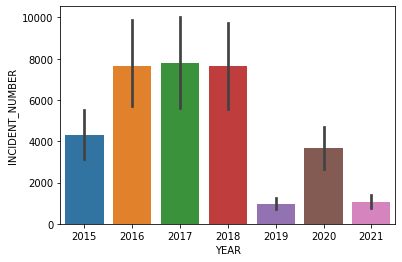

In [179]:

yc = union_df.groupby(['YEAR','DISTRICT']).count()['INCIDENT_NUMBER'].reset_index()

yc

sns.barplot(x = "YEAR", y = "INCIDENT_NUMBER",data = yc)



In [180]:
sns.catplot(y='OFFENSE_CODE_GROUP', kind='count', height=10, aspect=1.5,order=union_df.OFFENSE_CODE_GROUP.value_counts().index,   data=union_df)
#plt.xticks(size=10)
#plt.yticks(size=10)

AttributeError: ignored

In [181]:
union_df.groupby('YEAR').nunique()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
YEAR,,,,,,,,,,,,,,
2015,45150,228,213,12,875,36525,7,7,24,4,2936,11179,11175,11184
2016,81411,221,205,12,876,67991,12,7,24,4,3309,13189,13190,13196
2017,82667,194,188,12,877,68909,12,7,24,4,3325,13168,13171,13176
2018,80467,186,183,12,876,66435,12,7,24,4,3257,12918,12918,12925
2019,12631,84,84,13,827,10349,4,7,24,4,2153,4394,4394,4394
2020,47543,87,87,13,867,39217,12,7,24,4,3470,8336,8336,8336
2021,13945,81,81,13,821,12211,5,7,24,4,2260,4742,4742,4742


In [182]:
union_df.groupby('MONTH').nunique()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
MONTH,,,,,,,,,,,,,,
1,27018,263,180,13,869,22646,5,7,24,4,2703,10439,10440,10443
2,24635,255,175,13,865,20663,5,7,24,4,2612,9935,9935,9938
3,27282,252,172,13,871,22831,5,7,24,4,2711,10506,10505,10509
4,26679,251,173,13,866,22430,5,7,24,4,2656,10295,10296,10298
5,25571,247,175,13,870,21171,5,7,24,4,2678,9786,9784,9787
6,29197,259,182,13,875,23855,5,7,24,4,2788,10522,10519,10524
7,32552,269,189,13,868,26762,5,7,24,4,2836,11142,11139,11146
8,33478,267,186,13,869,27536,5,7,24,4,2885,11491,11491,11496
9,32861,262,181,13,872,27047,6,7,24,4,2799,11237,11233,11238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

[Text(0, 0, 'Brighton'),
 Text(0, 0, 'Charlestown'),
 Text(0, 0, 'Dorchester'),
 Text(0, 0, 'Downtown'),
 Text(0, 0, 'East Boston'),
 Text(0, 0, 'External'),
 Text(0, 0, 'Hyde Park'),
 Text(0, 0, 'Jamaica Plain'),
 Text(0, 0, 'Mattapan'),
 Text(0, 0, 'Roxbury'),
 Text(0, 0, 'South Boston'),
 Text(0, 0, 'South End'),
 Text(0, 0, 'West Roxbury')]

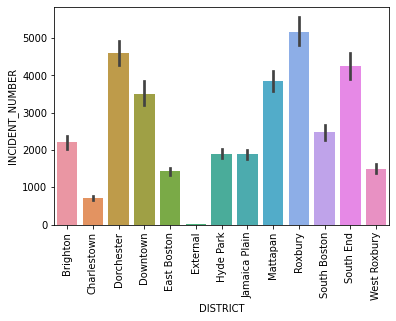

In [183]:
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("A15","Charlestown")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("A1","Downtown")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("A7","East Boston")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("B2","Roxbury")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("B3","Mattapan")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("C6","South Boston")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("C11","Dorchester")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("D4","South End")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("D14","Brighton")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("E5","West Roxbury")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("E18","Hyde Park")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("E13","Jamaica Plain")


ym = union_df.groupby(['MONTH','DISTRICT']).count()['INCIDENT_NUMBER'].reset_index()
#ym


g=sns.barplot(x = "DISTRICT", y = "INCIDENT_NUMBER",data = ym)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


In [184]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
categorical_col=union_df.select_dtypes(include=['object']).columns.tolist()
for x in categorical_col:
    union_df[x] = le.fit_transform(union_df[x].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



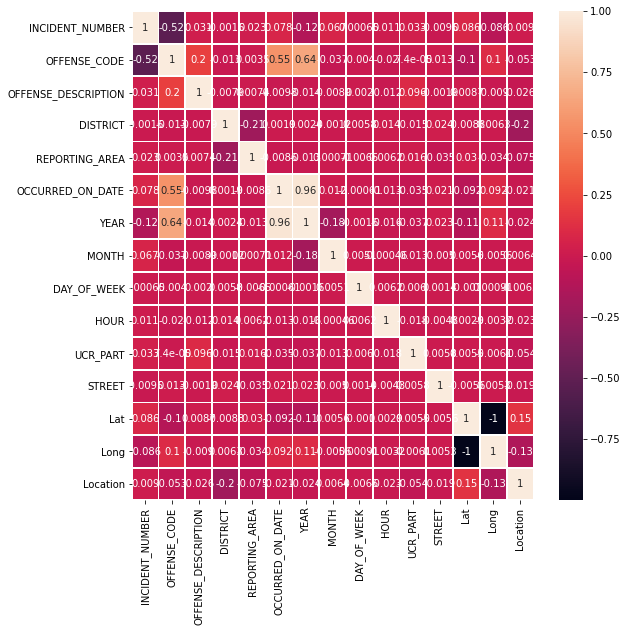

In [185]:
corrMatrix= union_df.corr()

fig, ax = plt.subplots(figsize=(9,9))         # Sample figsize in inches

sns.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

### Building Model

In [186]:
# drop column with High Correlation and intuitively 

columns_to_drop = ['INCIDENT_NUMBER', 'OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','SHOOTING','OCCURRED_ON_DATE','Location']

union_data_clean = union_data.drop(*columns_to_drop)

union_data_clean.show()


# Removing Null Values from Data
union_data_clean=union_data_clean.na.drop()
union_data_clean=union_data_clean.fillna(0)


# Converting Data types of column for processing
union_data_clean = union_data_clean.withColumn("REPORTING_AREA", union_data_clean['REPORTING_AREA'].cast('float'))
union_data_clean = union_data_clean.withColumn("MONTH", union_data_clean['MONTH'].cast('float'))
union_data_clean = union_data_clean.withColumn("HOUR", union_data_clean['HOUR'].cast('float'))
union_data_clean = union_data_clean.withColumn("Lat", union_data_clean['Lat'].cast('float'))
union_data_clean = union_data_clean.withColumn("Long", union_data_clean['Long'].cast('float'))



+--------+--------------+----+-----+-----------+----+----------+-------------+-----------+------------+
|DISTRICT|REPORTING_AREA|YEAR|MONTH|DAY_OF_WEEK|HOUR|  UCR_PART|       STREET|        Lat|        Long|
+--------+--------------+----+-----+-----------+----+----------+-------------+-----------+------------+
|      B2|           280|2015|    8|     Friday|  10|  Part Two|WASHINGTON ST|42.33011862|-71.08425106|
|     C11|           356|2015|    8|   Thursday|   0|  Part Two|   CHARLES ST|42.30060543|-71.06126785|
|      A1|           172|2015|   11|     Monday|  12|  Part Two|    ALBANY ST|42.33428841|-71.07239518|
|     E18|           525|2015|    7|     Friday|  10|  Part Two|   WINGATE RD| 42.2370095|-71.12956606|
|      D4|           159|2015|   12|    Tuesday|  12|  Part Two|     UPTON ST|42.34243222|-71.07225766|
|     C11|           336|2015|   12|     Friday|   0|  Part Two|    NORTON ST|42.30626521|-71.06864556|
|     E18|           478|2015|   12|    Tuesday|  12|  Part Two|

In [187]:

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

indexers = [StringIndexer(inputCol="DISTRICT", outputCol="DISTRICTIndex",handleInvalid="skip"),StringIndexer(inputCol="DAY_OF_WEEK", outputCol="DAY_OF_WEEKIndex",handleInvalid="skip"), StringIndexer(inputCol="UCR_PART", outputCol="UCR_PARTIndex",handleInvalid="skip"),StringIndexer(inputCol="STREET", outputCol="STREETIndex",handleInvalid="skip"),StringIndexer(inputCol="YEAR", outputCol="YEARIndex",handleInvalid="skip")]

pipeline = Pipeline(stages=indexers)
union_data_clean = pipeline.fit(union_data_clean).transform(union_data_clean)



vectorAssembler = VectorAssembler(inputCols = ['DISTRICTIndex','REPORTING_AREA','YEARIndex','MONTH','DAY_OF_WEEKIndex','HOUR','STREETIndex','Lat','Long'], outputCol = 'features',handleInvalid="skip")

vunion_data = vectorAssembler.transform(union_data_clean)


vunion_data_f = vunion_data.select(['features', 'UCR_PARTIndex'])



In [188]:
from pyspark.ml.stat import Correlation

r1 = Correlation.corr(vunion_data_f, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))



Pearson correlation matrix:
DenseMatrix([[ 1.00000000e+00,  1.71371713e-01,  2.42961013e-02,
              -1.36866432e-03, -3.57794607e-03, -6.92734886e-03,
               1.21542534e-01,  1.68591961e-04, -1.35652118e-04],
             [ 1.71371713e-01,  1.00000000e+00, -9.52273538e-03,
              -2.15155224e-03, -7.99535010e-04,  1.94849205e-02,
               1.20132930e-01, -3.86246539e-03, -6.39606405e-03],
             [ 2.42961013e-02, -9.52273538e-03,  1.00000000e+00,
               9.74763674e-02,  1.58602597e-03, -1.94524958e-02,
               3.08894831e-02, -8.53451706e-02,  8.53953193e-02],
             [-1.36866432e-03, -2.15155224e-03,  9.74763674e-02,
               1.00000000e+00,  2.19864710e-03, -4.31731551e-04,
               1.78381794e-03,  5.68359483e-03, -5.63117640e-03],
             [-3.57794607e-03, -7.99535010e-04,  1.58602597e-03,
               2.19864710e-03,  1.00000000e+00, -3.61227367e-02,
               4.29217174e-03,  8.32255476e-03, -8.2641203

In [ ]:
vunion_data_f.show()

In [189]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


(trainingData, testData) = vunion_data_f.randomSplit([0.7, 0.3])

rf = RandomForestClassifier(labelCol="UCR_PARTIndex", featuresCol="features",maxBins=4000)



model = rf.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "UCR_PARTIndex", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="UCR_PARTIndex", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))



IllegalArgumentException: ignored